# Time Series Weather Forcasting (FaceBook Prophet)

## Importing the libraries

In [2]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px

## Import the Dataset

In [3]:
df = pd.read_csv("DailyDelhiClimateTrain.csv", index_col=["date"], parse_dates=True)
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


## Check the Information of the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [5]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


## Data Visualization

<Axes: xlabel='date', ylabel='meantemp'>

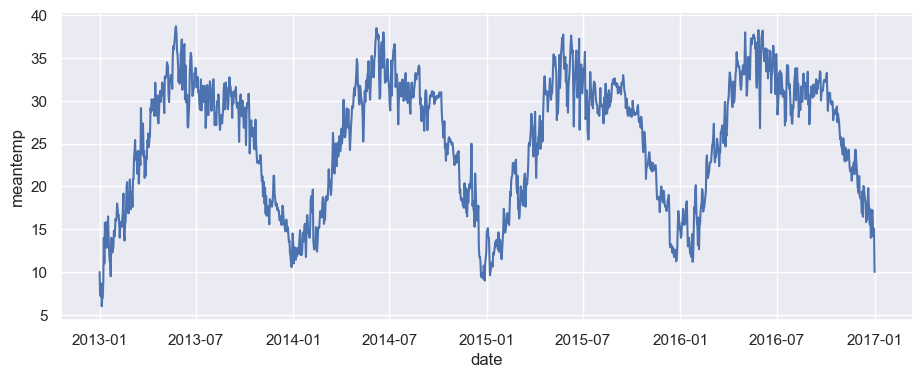

In [6]:
# Basic Lineplot
sns.set(rc={'figure.figsize':(11, 4)}, font_scale=1, style='darkgrid')

sns.lineplot(data=df, x="date", y="meantemp")

In [7]:
# same plot using the plotly

fig = px.line(data_frame=df, x=df.index, y="meantemp", title="Mean Temperature")
fig.show()

In [8]:
# make a scatter plot b/w meantemp and humidity
fig = px.scatter(df, x="meantemp", y="humidity", title="Mean Temperature v/s Humidity",
                 trendline="ols", trendline_color_override="red")
fig.show()

In [9]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df["meantemp"], df["humidity"])
print("Pearson's Correlation : %.3f" % corr)

Pearson's Correlation : -0.572


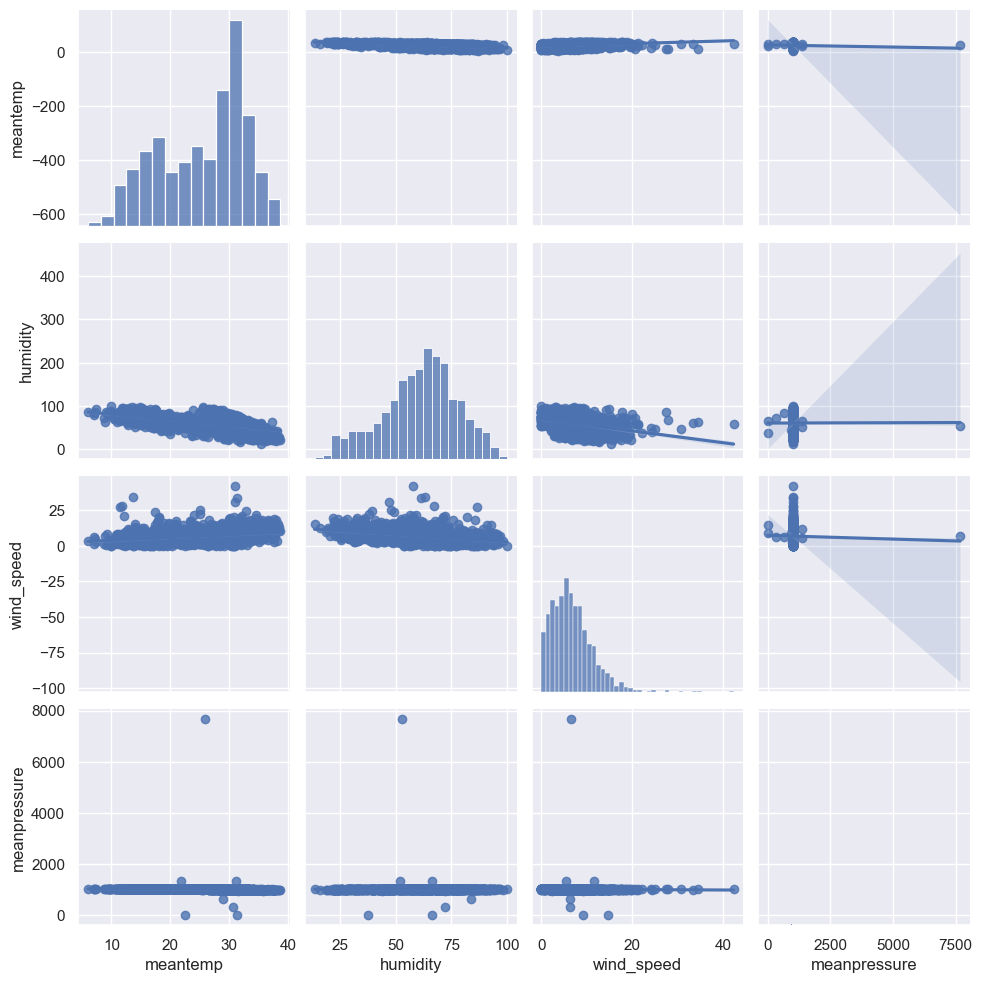

In [10]:
# make pair plot
sns.pairplot(df, kind="reg")

<Axes: >

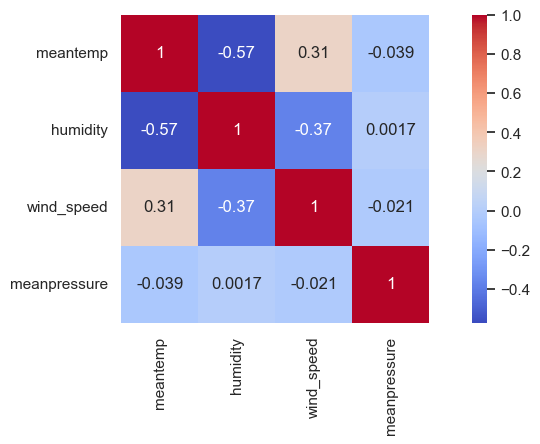

In [11]:
# make a heatmap of correlation
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True)

## Data Wrangling

In [12]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
# Fit the scaler to the data and transform it
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1.462000e+03,1.462000e+03,1.462000e+03,1.462000e+03
mean,-1.458022e-17,1.968330e-16,-1.944029e-16,-5.880689e-16
std,1.000342e+00,1.000342e+00,1.000342e+00,1.000342e+00
min,-2.654044e+00,-2.824109e+00,-1.491699e+00,-5.628829e+00
25%,-9.037230e-01,-6.201833e-01,-7.296443e-01,-5.286224e-02
50%,3.020541e-01,1.105528e-01,-1.273107e-01,-1.410365e-02
75%,7.909894e-01,6.828386e-01,5.342114e-01,2.131517e-02
max,1.799551e+00,2.340044e+00,7.766988e+00,3.701076e+01


<Axes: >

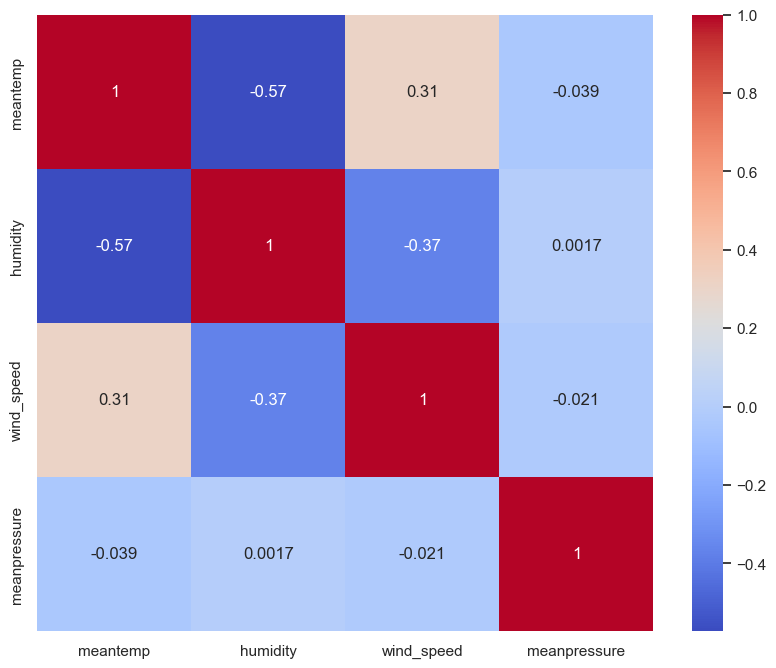

In [13]:
# make a correlation heatmap
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)

<Axes: xlabel='date', ylabel='meantemp'>

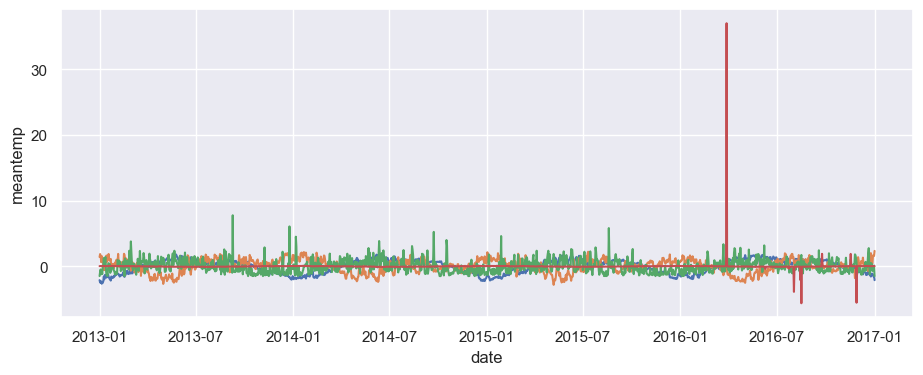

In [14]:
# Draw Lineplot of scaled values
sns.lineplot(data=df_scaled, x="date", y="meantemp")
sns.lineplot(data=df_scaled, x="date", y="humidity")
sns.lineplot(data=df_scaled, x="date", y="wind_speed")
sns.lineplot(data=df_scaled, x="date", y="meanpressure")

We see an outlier present in mean pressure column in the dataframe

In [15]:
fig = px.line(df_scaled, x=df.index, y="meanpressure", title="Mean Pressure")
fig.show()

The day March 28, 2016 is an outlier and need to be interpolated.

In [16]:
# Interpolate the data on March 28, 2016
df_scaled.loc['2016-03-28', 'meanpressure'] = np.nan
df_scaled['meanpressure'] = df_scaled['meanpressure'].interpolate(method='time')
df_scaled.loc['2016-03-28']

meantemp        0.059602
humidity       -0.475527
wind_speed     -0.056039
meanpressure    0.005317
Name: 2016-03-28 00:00:00, dtype: float64

Now the Outlier should've been handled.

In [17]:
fig = px.line(df_scaled, x=df_scaled.index, y="meanpressure", title="Mean Pressure")
fig.show()

In [18]:
# Interpolate the data on the specified dates
dates_to_interpolate = ['2016-08-02', '2016-08-14', '2016-08-16', '2016-09-24', '2016-11-17', '2016-11-28']

# Set the meanpressure to NaN for the specified dates
df_scaled.loc[dates_to_interpolate, 'meanpressure'] = np.nan

# Interpolate the meanpressure column using the time method
df_scaled['meanpressure'] = df_scaled['meanpressure'].interpolate(method='time')

# Display the rows for the specified dates to verify interpolation
df_scaled.loc[dates_to_interpolate]

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2016-08-02,0.706816,0.677246,-0.093685,-0.068225
2016-08-14,0.468010,1.367717,-0.094782,-0.060643
2016-08-16,0.794737,0.336733,1.724646,-0.064952
2016-09-24,0.782031,0.340511,-0.286413,-0.033593
2016-11-17,-0.512519,-0.539309,1.041173,0.027812
2016-11-28,-0.413987,-1.399048,0.522694,0.017711


Now check the lineplot of mean pressure.

<Axes: xlabel='date', ylabel='meantemp'>

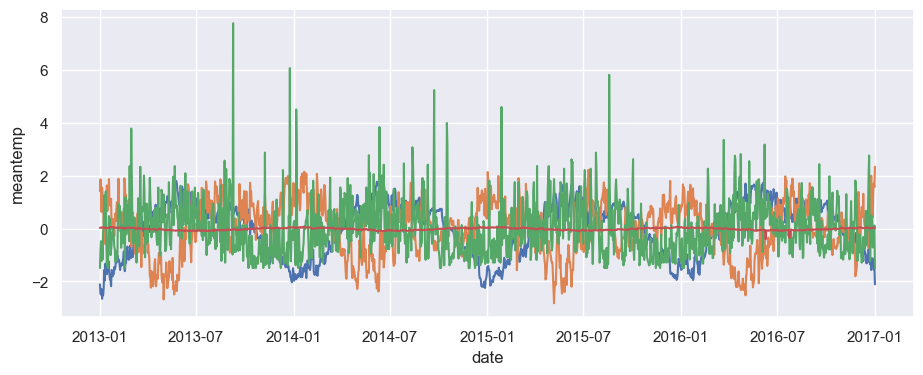

In [19]:
# Draw Lineplot of scaled values
sns.lineplot(data=df_scaled, x="date", y="meantemp")
sns.lineplot(data=df_scaled, x="date", y="humidity")
sns.lineplot(data=df_scaled, x="date", y="wind_speed")
sns.lineplot(data=df_scaled, x="date", y="meanpressure")

In [20]:
# Make two columns of Month and Year
df_scaled['month'] = df_scaled.index.month
df_scaled['year'] = df_scaled.index.year
df_scaled.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,-2.109500,1.415439,-1.491699,0.025321,1,2013
2013-01-02,-2.463454,1.862828,-0.838196,0.037162,1,2013
2013-01-03,-2.495219,1.564569,-0.475626,0.041972,1,2013
2013-01-04,-2.291015,0.630022,-1.221233,0.033647,1,2013
2013-01-05,-2.654044,1.554627,-0.680303,0.029946,1,2013


(1.0, 12.0)

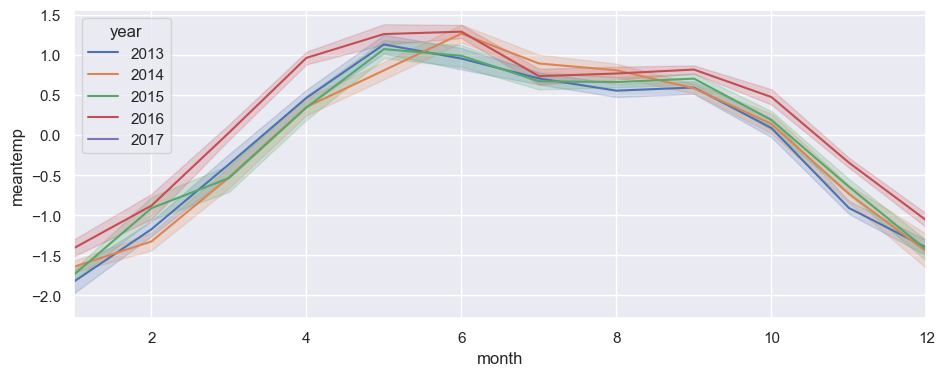

In [21]:
# Now we check the hue
sns.lineplot(df_scaled, x="month", y="meantemp", hue="year", palette="deep")
plt.xlim(1,12)

In [22]:
df['month'] = df.index.month
df['year'] = df.index.year
df.head()

fig = px.line(df, x=df.index, y="meantemp", color="year", title="Mean Temperature by Month")
fig.show()

## Model Creation and Fitting

In [23]:
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [24]:
# rename the column names as the prophet takes the dates as the name ds, and the variable as the y
df = df.rename(columns={'date':'ds', 'meantemp':'y'})
df.head

,ds,y,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [34]:
# Import the Library
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Call the Model
model = Prophet()
model.fit(df)
forecast = model.make_future_dataframe(periods=365)
forecast = model.predict(forecast)
plot_plotly(model, forecast)

18:19:13 - cmdstanpy - INFO - Chain [1] start processing
18:19:14 - cmdstanpy - INFO - Chain [1] done processing


Thus, we can observe the predicted values the Prophet library has made using the provided data for the next year.